In [ ]:
pip install pcse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.4/826.4 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pcse: filename=PCSE-5.5.5-py3-none-any.whl size=936509 sha256=b67909179e4e7cb670e78da36cbb6dc42deb41aac26dfdab994b9919b278aa2a
  Stored in directory: /root/.cache/pip/wheels/06/ce/04/ca5f2314281f264a2e55e6c542d52208ce00b458c8f010d50a
  Created wheel for traitlets-pcse: filename=traitlets_pcse-5.0.0.dev0-py2.py3-none-any.whl size=92099 sha256=63bac36142aa76a19050c9f59317955439ea106ea56432b7551ab84aed7d698c
  Stored in directory: /root/.cache/pip/wheels/51/75/c1/71041f9f727383549075347920630e986593133c0930fba2ce
Successfully built pcse traitlets-pcse
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.20
    Uninstalling

In [ ]:
import os, sys, random
from itertools import product

from datetime import datetime
import yaml
import pandas as pd
import numpy as np
import pcse
from pcse.fileinput import CABOFileReader
from pcse.models import Wofost72_WLP_FD
from pcse.base import ParameterProvider
from pcse.exceptions import WeatherDataProviderError
from pcse.util import WOFOST72SiteDataProvider
from pcse.db import NASAPowerWeatherDataProvider
from pcse.fileinput import YAMLAgroManagementReader
from pcse.util import WOFOST72SiteDataProvider
from pcse.fileinput import ExcelWeatherDataProvider
from pcse.fileinput import YAMLCropDataProvider
%matplotlib inline

import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt

Building PCSE demo database at: /tmp/.pcse/pcse.db ... OK


In [ ]:
# cropd = YAMLCropDataProvider()
# cropd.print_crops_varieties()

In [ ]:
data_dir = '/content/drive/MyDrive/Samples/agrofiles'
soilfile = '/content/drive/MyDrive/Samples/ec3.soil'
basedir = "/content/drive/MyDrive/Samples/noise_samples"

In [ ]:
soilfile = '/content/drive/MyDrive/Samples/ec3.soil'

# agromanagement_file= os.path.join(data_dir, agro_cropname)
# agro_cropname = "cotton.agro"
# agromanagement = YAMLAgroManagementReader(agromanagement_file)
# print(agromanagement)

basedir = "/content/drive/MyDrive/Samples/noise_samples"

In [ ]:
# from types import CoroutineType
# import sys
# import os
# import  random
# dirname = (r"C:\Users\Deepika Chandrababu\Desktop\Thesis\bfts-master")
# file = (r"C:\Users\Deepika Chandrababu\Desktop\Thesis\bfts-master\bandit.py")
# sys.path.append(os.path.dirname(file))

# # from bandit import Bandit
# from datetime import datetime
# import yaml
# import pandas as pd
# import numpy as np
# import pcse
# from pcse.fileinput import CABOFileReader
# from pcse.models import Wofost72_WLP_FD
# from pcse.base import ParameterProvider
# from pcse.exceptions import WeatherDataProviderError
# from pcse.util import WOFOST72SiteDataProvider
# from pcse.fileinput import YAMLAgroManagementReader
# from pcse.util import WOFOST72SiteDataProvider
# from pcse.fileinput import ExcelWeatherDataProvider
# from pcse.fileinput import YAMLCropDataProvider


# data_dir = (r'C:\Users\Deepika Chandrababu\Desktop\bandits\bfts-master\agro')
# soilfile = (r'C:\Users\Deepika Chandrababu\Desktop\bandits\bfts-master\soil\ec3.soil')
# basedir = (r"C:\Users\Deepika Chandrababu\Desktop\bandits\bfts-master\samples")

In [ ]:
crops = ['barley', 'cassava', 'chickpea', 'cotton','cowpea',
            'fababean', 'groundnut', 'maize', 'millet', 'mungbean',
            'pigeonpea', 'potato', 'rapeseed', 'sorghum', 'soybean',
            'sugarbeet','sugarcane', 'sunflower', 'sweetpotato', 'wheat',
            'seed_onion']
varieties = ['Spring_barley_301', 'Cassava_VanHeemst_1988', 'Chickpea_VanHeemst_1988', 'Cotton_VanHeemst_1988','Cowpea_VanHeemst_1988',
            'Faba_bean_801', 'Groundnut_VanHeemst_1988', 'Maize_VanHeemst_1988', 'Millet_VanHeemst_1988', 'Mungbean_VanHeemst_1988',
            'Pigeonpea_VanHeemst_1988', 'Potato_701', 'Oilseed_rape_1001', 'Sorghum_VanHeemst_1988', 'Soybean_VanHeemst_1988',
            'Sugarbeet_601','Sugarcane_VanHeemst_1988', 'Sunflower_1101', 'Sweetpotato_VanHeemst_1988', 'Winter_wheat_101',
            'onion_agriadapt']
def variety_name(crop):
    return varieties[crops.index(crop)]

def agro_file(crop):
    return crop + ".agro"

def n_arms():
    return len(crops)

def agri(crop):
    cropd = YAMLCropDataProvider()
    variety = variety_name(crop)
    cropd.set_active_crop(crop,variety)
    agro_cropname = agro_file(crop)
    agromanagement_file= os.path.join(data_dir, agro_cropname)
    agromanagement = YAMLAgroManagementReader(agromanagement_file)
    print(agromanagement)
    file = random.choice([x for x in os.listdir(basedir) if os.path.isfile(os.path.join(basedir, x))])
    print("Sampling file {}...".format(file))
    wdp = ExcelWeatherDataProvider(os.path.join(basedir, file))
    print(wdp)
    soild = CABOFileReader(soilfile)
    sited = WOFOST72SiteDataProvider(WAV=10, CO2=360, CRAIRC=0.6)
    parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)
    wofsim = Wofost72_WLP_FD(parameters, wdp, agromanagement)
    wofsim.run_till_terminate()
    wofsim.get_output()
    df_summary= pd.DataFrame(wofsim.get_summary_output())
    twso = df_summary["TWSO"].item()
    return twso


In [ ]:
agri("cowpea")

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2042-01-01:
    CropCalendar:
      crop_end_date: 2047-12-20
      crop_end_type: maturity
      crop_name: cowpea
      crop_start_date: 2042-01-01
      crop_start_type: sowing
      max_duration: 365
      variety_name: Cowpea_VanHeemst_1988
    StateEvents: null
    TimedEvents: null

Sampling file sample90.xlsx...
Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: United Kingdom
Station: Cornwall
Description: Observed data from ceda
Source: Meteorology and Air Quality Group
Contact: Peter Uithol
----Site characteristics----
Elevation:    4.2
Latitude:  50.090
Longitude: -5.670
Data available for 2042-01-01 - 2047-12-31
Number of missing days: 0

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360, 'CRAIRC': 0.6}


912.1214934470407

In [ ]:
agri("barley")

Sampling file sample97.xlsx...
Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360, 'CRAIRC': 0.6}


9.008392279920873

In [ ]:
# def agri(crop_name, variety_name, agro_cropname):
#     cropd = YAMLCropDataProvider()
#     cropd.set_active_crop(crop_name,variety_name)
#     agromanagement_file= os.path.join(data_dir, agro_cropname)
#     agromanagement = YAMLAgroManagementReader(agromanagement_file)
#     print(agromanagement)
#     file = random.choice([x for x in os.listdir(basedir) if os.path.isfile(os.path.join(basedir, x))])
#     print("Sampling file {}...".format(file))
#     wdp = ExcelWeatherDataProvider(os.path.join(basedir, file))
#     print(wdp)
#     soild = CABOFileReader(soilfile)
#     # sited = WOFOST72SiteDataProvider(WAV=10, CO2=360, CRAIRC=0.6)
#     parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)
#     wofsim = Wofost72_WLP_FD(parameters, wdp, agromanagement)
#     wofsim.run_till_terminate()
#     wofsim.get_output()
#     df_summary= pd.DataFrame(wofsim.get_summary_output())
#     twso = df_summary["TWSO"].item()
#     return twso


In [ ]:
# agri(cropd.set_active_crop('barley', "Spring_barley_301"), "barley.agro")
# agri("cassava", "Cassava_VanHeemst_1988", "cassava.agro")
# agri('chickpea', "Chickpea_VanHeemst_1988", "chickpea.agro")
# agri('cowpea', "Cowpea_VanHeemst_1988", "cowpea.agro")
# agri('cotton', "Cotton_VanHeemst_1988", "cotton.agro")
# agri('fababean', 'Faba_bean_801', "fababean.agro")
# agri('groundnut', "Groundnut_VanHeemst_1988", "groundnut.agro")
# agri'maize', "Maize_VanHeemst_1988", "maize.agro")
# agri('millet', "Millet_VanHeemst_1988", "millet.agro")
# agri('mungbean', "Mungbean_VanHeemst_1988", "mungbean.agro")
# agri('pigeonpea', "Pigeonpea_VanHeemst_1988", "pigeonpea.agro")
# agri('potato', 'Potato_701', "potato.agro")
# agri('rapeseed', "Oilseed_rape_1001", "rapeseed.agro")
# agri('sorghum', "Sorghum_VanHeemst_1988", "sorghum.agro")
# agri('soybean', "Soybean_VanHeemst_1988", "pigeonpea.agro")
# agri('sugarcane', "Sugarcane_VanHeemst_1988", "sugarcane.agro")
# agri('sunflower', "Sunflower_1101", "sunflower.agro")
# agri('sweetpotato', "Sweetpotato_VanHeemst_1988", "sweetpotato.agro")
# agri('wheat', 'Winter_wheat_101', "wheat.agro")
# agri('seed_onion',  'onion_agriadapt', "seed_onion.agro")
# agri('sugarbeet',  'Sugarbeet_601', "sugarbeet.agro")



!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2042-01-01:
    CropCalendar:
      crop_end_date: 2047-10-20
      crop_end_type: maturity
      crop_name: sugarbeet
      crop_start_date: 2042-04-05
      crop_start_type: sowing
      max_duration: 365
      variety_name: Sugarbeet_601
    StateEvents: null
    TimedEvents: null

Sampling file sample6.xlsx...
Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: United Kingdom
Station: Cornwall
Description: Observed data from ceda
Source: Meteorology and Air Quality Group
Contact: Peter Uithol
----Site characteristics----
Elevation:    4.2
Latitude:  50.090
Longitude: -5.670
Data available for 2042-01-01 - 2047-12-31
Number of missing days: 0

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360, 'CRAIRC': 0.6}


5.002589878649729

In [ ]:
# agri("cassava", "Cassava_VanHeemst_1988", "cassava.agro")
# agri('chickpea', "Chickpea_VanHeemst_1988", "chickpea.agro")

In [ ]:
# crop_name = "cotton"
# variety_name = "Cotton_VanHeemst_1988"
# agro_cropname = "cotton.agro"
# cropd = YAMLCropDataProvider()
# cropd.set_active_crop(crop_name,variety_name)

# agromanagement_file= os.path.join(data_dir, agro_cropname)
# agromanagement = YAMLAgroManagementReader(agromanagement_file)
# wdp = ExcelWeatherDataProvider("/content/drive/MyDrive/Samples/noise_samples/sample91.xlsx")
#     # print(wdp)

# soild = CABOFileReader(soilfile)
# sited = WOFOST72SiteDataProvider(WAV=10, CO2=360, CRAIRC=0.6)
# parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

# wofsim = Wofost72_WLP_FD(parameters, wdp, agromanagement)
# wofsim.run_till_terminate()
# wofsim.get_output()
# df_summary= pd.DataFrame(wofsim.get_summary_output())
# twso = df_summary["TWSO"].item()
# twso
# # df_summary["TWSO"]

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360, 'CRAIRC': 0.6}


4.040739207302108

In [ ]:
#  agri('chickpea', "Chickpea_VanHeemst_1988", "chickpea.agro")

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2042-01-01:
    CropCalendar:
      crop_end_date: 2047-12-20
      crop_end_type: maturity
      crop_name: chickpea
      crop_start_date: 2042-01-01
      crop_start_type: sowing
      max_duration: 365
      variety_name: Chickpea_VanHeemst_1988
    StateEvents: null
    TimedEvents: null

Sampling file sample57.xlsx...
Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: United Kingdom
Station: Cornwall
Description: Observed data from ceda
Source: Meteorology and Air Quality Group
Contact: Peter Uithol
----Site characteristics----
Elevation:    4.2
Latitude:  50.090
Longitude: -5.670
Data available for 2042-01-01 - 2047-12-31
Number of missing days: 0

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360, 'CRAIRC': 0.6}


22.799175900629653

In [ ]:
# iterate agri for 100
vals = [agri('barley') for i in range(100)]
vals_cassava = [agri("cassava") for i in range(100)]
vals_chickpea = [agri('chickpea') for i in range(100)]
vals_cotton = [agri('cotton') for i in range(100)]
vals_cowpea = [agri('cowpea') for i in range(100)]
vals_fababean = [agri('fababean') for i in range(100)]
vals_groundnut = [ agri('groundnut') for i in range(100)]
vals_maize = [ agri('maize') for i in range(100)]
vals_millet = [agri('millet') for i in range(100)]
vals_mungbean = [agri('mungbean') for i in range(100)]
vals_pigeonpea = [agri('pigeonpea') for i in range(100)]
vals_potato = [agri('potato') for i in range(100)]
vals_rapeseed = [agri('rapeseed') for i in range(100)]
vals_sorghum =[agri('sorghum') for i in range(100)]
vals_soybean = [agri('soybean') for i in range(100)]
vals_sugarcane = [agri('sugarcane') for i in range(100)]
vals_sunflower = [agri('sunflower') for i in range(100)]
vals_sweetpotato = [agri('sweetpotato') for i in range(100)]
vals_wheat = [agri('wheat') for i in range(100)]
vals_onion = [agri('seed_onion') for i in range(100)]
vals_sugarbeet = [agri('sugarbeet') for i in range(100)]

Streaming output truncated to the last 5000 lines.
Contact: Peter Uithol
----Site characteristics----
Elevation:    4.2
Latitude:  50.090
Longitude: -5.670
Data available for 2042-01-01 - 2047-12-31
Number of missing days: 0

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360, 'CRAIRC': 0.6}
!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2042-01-01:
    CropCalendar:
      crop_end_date: 2047-12-20
      crop_end_type: maturity
      crop_name: seed_onion
      crop_start_date: 2042-01-01
      crop_start_type: sowing
      max_duration: 365
      variety_name: onion_agriadapt
    StateEvents: null
    TimedEvents: null

Sampling file sample51.xlsx...
Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: United Kingdom
Station: Cornwall
Description: Observed data from ceda
Source: Meteorology and Air Quality Group
Contact: Peter Uithol
----Site characteristics----
Eleva

In [ ]:
dfbarley = dfcotton = pd.DataFrame(vals,columns =['Barley'])
dfbarley

,Barley
0,3.589260
1,5.500259
2,4.416565
3,12.264386
4,20.069452
...,...
95,1193.241144
96,1193.241144
97,3.390830
98,11.819914


In [ ]:
dfcassava = pd.DataFrame(vals_cassava,columns =['Cassava'])
dfcassava

,Cassava
0,668.896911
1,1099.283297
2,853.125080
3,686.065331
4,1002.099649
...,...
95,609.870255
96,656.668332
97,749.347627
98,686.065331


In [ ]:
dfchickpea = pd.DataFrame(vals_chickpea,columns =['Chickpea'])
dfchickpea

,Chickpea
0,28.884598
1,30.435704
2,25.823004
3,21.138033
4,22.799176
...,...
95,23.932762
96,77.080062
97,186.020360
98,27.378603


In [ ]:
dfcowpea = pd.DataFrame(vals_cowpea,columns =['Cowpea'])
dfcowpea

,Cowpea
0,901.165443
1,841.280693
2,752.355396
3,603.558093
4,647.380189
...,...
95,807.320312
96,919.694497
97,905.941207
98,356.647910


In [ ]:
dfcotton = pd.DataFrame(vals_cotton,columns =['cotton'])
dfcotton

,cotton
0,2.062101
1,4.554558
2,1.992936
3,2.142745
4,2.086708
...,...
95,2.293028
96,2.423898
97,4.717228
98,5.223555


In [ ]:
dffababean = pd.DataFrame(vals_fababean, columns =['Fababean'])
dffababean

,Fababean
0,120.264037
1,59.229934
2,3974.516742
3,63.061860
4,80.668229
...,...
95,70.223737
96,107.403038
97,111.202883
98,59.089926


In [ ]:
df_groundnut = pd.DataFrame(vals_groundnut,columns =['Groundnut'])
df_groundnut

,Groundnut
0,78.388366
1,67.835785
2,66.997191
3,133.713356
4,58.851404
...,...
95,71.785705
96,70.897917
97,61.215526
98,165.144174


In [ ]:
df_maize = pd.DataFrame(vals_maize,columns =['Maize'])
df_maize

,Maize
0,453.082086
1,257.327145
2,495.488903
3,257.164384
4,449.561740
...,...
95,227.619484
96,544.481044
97,428.655205
98,210.984181


In [ ]:
df_millet = pd.DataFrame(vals_millet,columns =['Millet'])
df_millet

,Millet
0,9.629998
1,8.540613
2,9.018776
3,8.386622
4,8.176832
...,...
95,7.752034
96,9.620570
97,14.825394
98,15.331290


In [ ]:
df_mungbean = pd.DataFrame(vals_mungbean,columns =['Mungbean'])
df_mungbean

,Mungbean
0,142.520894
1,183.116563
2,175.322596
3,408.218671
4,97.253285
...,...
95,174.438901
96,152.438064
97,316.283211
98,147.656941


In [ ]:
df_pigeonpea = pd.DataFrame(vals_pigeonpea,columns =['Pigeonpea'])
df_pigeonpea

,Pigeonpea
0,126.415095
1,319.920521
2,353.113429
3,396.810169
4,178.985600
...,...
95,146.678722
96,198.646873
97,1009.532114
98,148.396229


In [ ]:
df_potato = pd.DataFrame(vals_potato,columns =['Potato'])
df_potato

,Potato
0,1442.740711
1,990.044459
2,1693.004391
3,573.368195
4,1180.722009
...,...
95,1182.143012
96,1108.113410
97,630.312286
98,1648.892038


In [ ]:
df_rapeseed = pd.DataFrame(vals_rapeseed,columns =['Rapeseed'])
df_rapeseed

,Rapeseed
0,3.038198
1,6.763877
2,5.029568
3,20.749531
4,13.995073
...,...
95,6.763877
96,9.799295
97,1.700195
98,0.971741


In [ ]:
df_sorghum = pd.DataFrame(vals_sorghum,columns =['Sorghum'])
df_sorghum

,Sorghum
0,517.588519
1,357.023713
2,305.519005
3,300.391365
4,280.002452
...,...
95,322.907957
96,349.799409
97,300.391365
98,436.955122


In [ ]:
df_soybean = pd.DataFrame(vals_soybean,columns =['Soybean'])
df_soybean

,Soybean
0,33.730252
1,24.681789
2,31.819398
3,28.257655
4,125.550607
...,...
95,23.842745
96,33.816472
97,26.214535
98,19.122733


In [ ]:
df_sugarcane = pd.DataFrame(vals_sugarcane,columns =['Sugarcane'])
df_sugarcane

,Sugarcane
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


In [ ]:
df_sunflower = pd.DataFrame(vals_sunflower,columns =['Sunflower'])
df_sunflower

,Sunflower
0,12.056917
1,6.512737
2,11.474420
3,10.246332
4,7.085457
...,...
95,6.512737
96,7.908505
97,15.977616
98,16.895639


In [ ]:
df_sweetpotato = pd.DataFrame(vals_sweetpotato,columns =['Sweatpotato'])
df_sweetpotato

,Sweatpotato
0,25.772229
1,24.375878
2,28.539145
3,32.529614
4,132.179283
...,...
95,170.107917
96,72.628611
97,32.529614
98,25.629367


In [ ]:
df_wheat = pd.DataFrame(vals_wheat,columns =['Wheat'])
df_wheat

,Wheat
0,23.084928
1,10.752001
2,34.402640
3,31.657563
4,10.315399
...,...
95,6.209387
96,12.959471
97,21.222170
98,23.398078


In [ ]:
df_seedonion = pd.DataFrame(vals_onion,columns =['Seed-Onion'])
df_seedonion

,Seed-Onion
0,6.467116
1,9.184363
2,10.259816
3,6.181986
4,5.726119
...,...
95,8.023890
96,6.194353
97,6.347309
98,5.644443


In [ ]:
df_sugarbeet = pd.DataFrame(vals_sugarbeet,columns =['Sugarbeet'])
df_sugarbeet

,Sugarbeet
0,4.540011
1,8.863861
2,10.060190
3,4.836357
4,4.846155
...,...
95,4.484216
96,5.691658
97,10.464473
98,4.444576


In [ ]:
# df_merged = dfbarley.merge(dfcassava,how ='right').merge(dfchickpea,how ='right').merge(dfcotton,how ='right').merge(dffababean,how ='right').merge(df_groundnut,how ='right').merge(df_maize,how ='right').merge(df_millet,how ='right').merge(df_mungbean,how ='right').merge(df_pigeonpea,how ='right').merge(df_potato,how ='right').merge(df_rapeseed,how ='right').merge(df_sorghum,how ='right').merge(df_soybean,how ='right').merge(df_sunflower,how ='right').merge(df_sweetpotato,how ='right').merge(df_wheat,how ='right').merge(df_seedonion,how ='right')

In [ ]:
df_merged = pd.concat([dfbarley, dfcassava, dfchickpea,dfcotton,dfcowpea, dffababean,df_groundnut,
                       df_maize,df_millet,df_mungbean,df_pigeonpea,df_potato,df_rapeseed,
                       df_sorghum,df_soybean,df_sunflower,df_sweetpotato,df_wheat,df_seedonion], axis=1)

In [ ]:
df_merged

,Barley,Cassava,Chickpea,cotton,Cowpea,Fababean,Groundnut,Maize,Millet,Mungbean,Pigeonpea,Potato,Rapeseed,Sorghum,Soybean,Sunflower,Sweatpotato,Wheat,Seed-Onion
0,3.589260,668.896911,28.884598,2.062101,901.165443,120.264037,78.388366,453.082086,9.629998,142.520894,126.415095,1442.740711,3.038198,517.588519,33.730252,12.056917,25.772229,23.084928,6.467116
1,5.500259,1099.283297,30.435704,4.554558,841.280693,59.229934,67.835785,257.327145,8.540613,183.116563,319.920521,990.044459,6.763877,357.023713,24.681789,6.512737,24.375878,10.752001,9.184363
2,4.416565,853.125080,25.823004,1.992936,752.355396,3974.516742,66.997191,495.488903,9.018776,175.322596,353.113429,1693.004391,5.029568,305.519005,31.819398,11.474420,28.539145,34.402640,10.259816
3,12.264386,686.065331,21.138033,2.142745,603.558093,63.061860,133.713356,257.164384,8.386622,408.218671,396.810169,573.368195,20.749531,300.391365,28.257655,10.246332,32.529614,31.657563,6.181986
4,20.069452,1002.099649,22.799176,2.086708,647.380189,80.668229,58.851404,449.561740,8.176832,97.253285,178.985600,1180.722009,13.995073,280.002452,125.550607,7.085457,132.179283,10.315399,5.726119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1193.241144,609.870255,23.932762,2.293028,807.320312,70.223737,71.785705,227.619484,7.752034,174.438901,146.678722,1182.143012,6.763877,322.907957,23.842745,6.512737,170.107917,6.209387,8.023890
96,1193.241144,656.668332,77.080062,2.423898,919.694497,107.403038,70.897917,544.481044,9.620570,152.438064,198.646873,1108.113410,9.799295,349.799409,33.816472,7.908505,72.628611,12.959471,6.194353
97,3.390830,749.347627,186.020360,4.717228,905.941207,111.202883,61.215526,428.655205,14.825394,316.283211,1009.532114,630.312286,1.700195,300.391365,26.214535,15.977616,32.529614,21.222170,6.347309
98,11.819914,686.065331,27.378603,5.223555,356.647910,59.089926,165.144174,210.984181,15.331290,147.656941,148.396229,1648.892038,0.971741,436.955122,19.122733,16.895639,25.629367,23.398078,5.644443


In [ ]:
df_merged.to_csv("yield100samples_update.csv", index=False)

In [ ]:
dfmerged = pd.concat([df,df_cowpea,df_sugarbeet],axis=1)

In [ ]:
dfmerged.to_csv("yield100samples.csv")

In [ ]:
df = pd.read_csv("yield100samples_update.csv")
df

,Barley,Cassava,Chickpea,cotton,Cowpea,Fababean,Groundnut,Maize,Millet,Mungbean,Pigeonpea,Potato,Rapeseed,Sorghum,Soybean,Sunflower,Sweatpotato,Wheat,Seed-Onion
0,3.589260,668.896911,28.884598,2.062101,901.165443,120.264037,78.388366,453.082086,9.629998,142.520894,126.415095,1442.740711,3.038198,517.588519,33.730252,12.056917,25.772229,23.084928,6.467116
1,5.500259,1099.283297,30.435704,4.554558,841.280693,59.229934,67.835785,257.327145,8.540613,183.116563,319.920521,990.044459,6.763877,357.023713,24.681789,6.512737,24.375878,10.752001,9.184363
2,4.416565,853.125080,25.823004,1.992936,752.355396,3974.516742,66.997191,495.488903,9.018776,175.322596,353.113429,1693.004391,5.029568,305.519005,31.819398,11.474420,28.539145,34.402640,10.259816
3,12.264386,686.065331,21.138033,2.142745,603.558093,63.061860,133.713356,257.164384,8.386622,408.218671,396.810169,573.368195,20.749531,300.391365,28.257655,10.246332,32.529614,31.657563,6.181986
4,20.069452,1002.099649,22.799176,2.086708,647.380189,80.668229,58.851404,449.561740,8.176832,97.253285,178.985600,1180.722009,13.995073,280.002452,125.550607,7.085457,132.179283,10.315399,5.726119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1193.241144,609.870255,23.932762,2.293028,807.320312,70.223737,71.785705,227.619484,7.752034,174.438901,146.678722,1182.143012,6.763877,322.907957,23.842745,6.512737,170.107917,6.209387,8.023890
96,1193.241144,656.668332,77.080062,2.423898,919.694497,107.403038,70.897917,544.481044,9.620570,152.438064,198.646873,1108.113410,9.799295,349.799409,33.816472,7.908505,72.628611,12.959471,6.194353
97,3.390830,749.347627,186.020360,4.717228,905.941207,111.202883,61.215526,428.655205,14.825394,316.283211,1009.532114,630.312286,1.700195,300.391365,26.214535,15.977616,32.529614,21.222170,6.347309
98,11.819914,686.065331,27.378603,5.223555,356.647910,59.089926,165.144174,210.984181,15.331290,147.656941,148.396229,1648.892038,0.971741,436.955122,19.122733,16.895639,25.629367,23.398078,5.644443


In [ ]:
['barley', 'cassava', 'chickpea', 'cotton','cowpea',
            'fababean', 'groundnut', 'maize', 'millet', 'mungbean',
            'pigeonpea', 'potato', 'rapeseed', 'sorghum', 'soybean',
            'sugarbeet','sugarcane', 'sunflower', 'sweetpotato', 'wheat',
            'seed_onion']

In [ ]:
df["Seed-Onion"].mean()

11.49314723943683

Text(0, 0.5, 'Yield / Total Production')

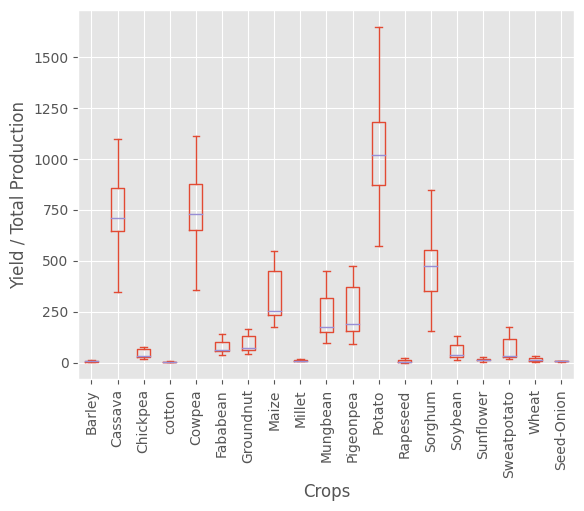

In [ ]:
# NEW
df.plot.box(showfliers=False,rot=90)
plt.xlabel("Crops")
plt.ylabel("Yield / Total Production")

Text(0, 0.5, 'Yield / Total Production')

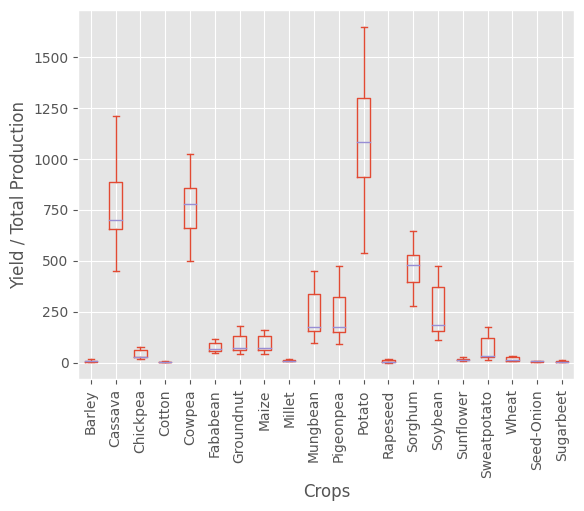

In [ ]:
df.plot.box(showfliers=False,rot=90)
plt.xlabel("Crops")
plt.ylabel("Yield / Total Production")

Text(0, 0.5, 'Yield / Total Production')

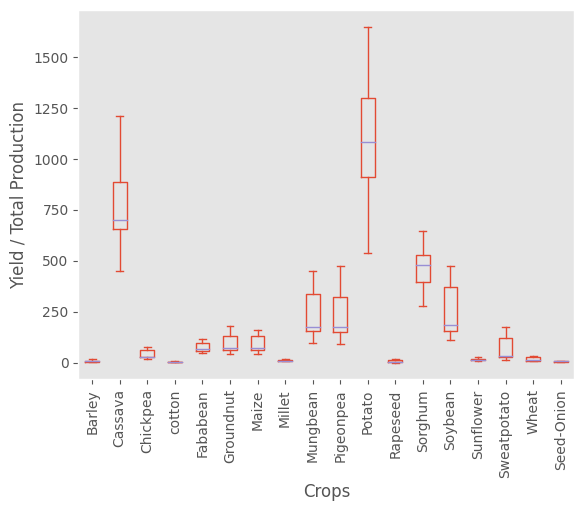

In [ ]:
#missed cowpea and sugarbeet
df_merged.plot.box(showfliers=False,rot=90)
plt.xlabel("Crops")
plt.ylabel("Yield / Total Production")

Text(0, 0.5, 'Yield / Total Production')

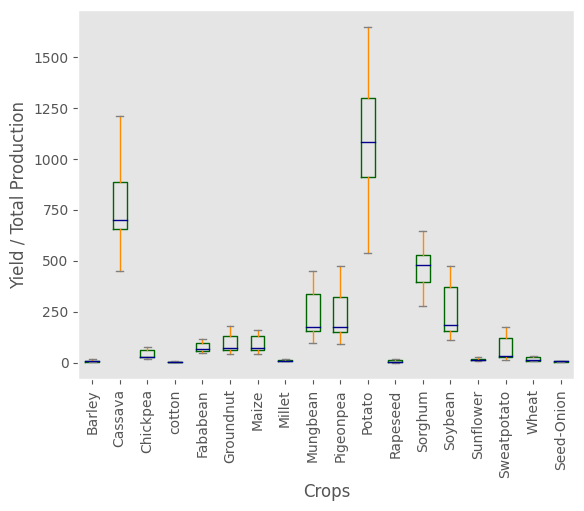

In [ ]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}
ax = df_merged.plot.box(color=color, sym="r+",showfliers=False,rot=90, grid=False)
plt.xlabel("Crops")
plt.ylabel("Yield / Total Production")